Credits/Course URL: https://www.udemy.com/course/machinelearning/

## Logistic Regression Classifier

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

#### Reading the data

In [2]:
data = pd.read_csv(r'E:\Github\Datasets\Social_Network_Ads.csv')

In [3]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


#### Data Exploration

In [4]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


<AxesSubplot: xlabel='Age', ylabel='Count'>

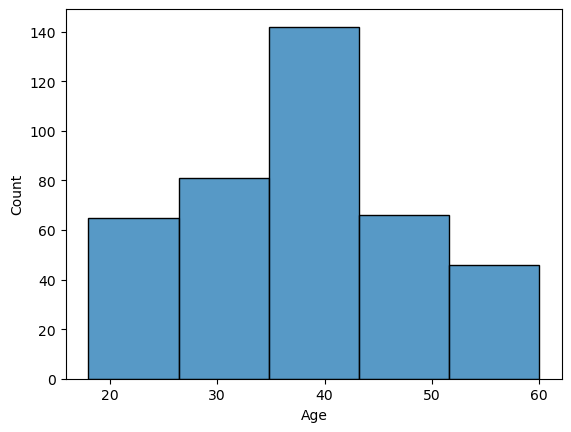

In [6]:
sns.histplot(x = 'Age', data = data, bins = 5)

<AxesSubplot: xlabel='EstimatedSalary', ylabel='Count'>

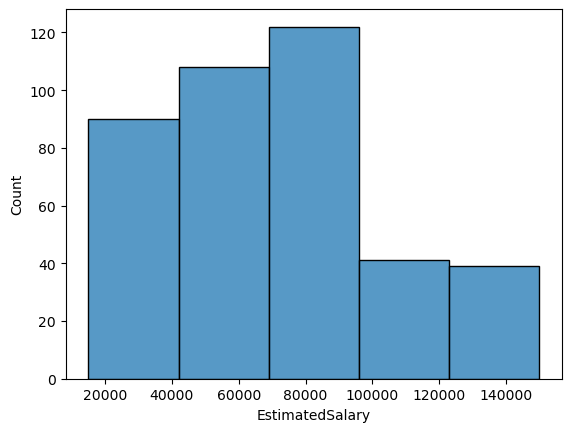

In [7]:
sns.histplot(x = 'EstimatedSalary', data = data, bins = 5)

<AxesSubplot: xlabel='Purchased', ylabel='count'>

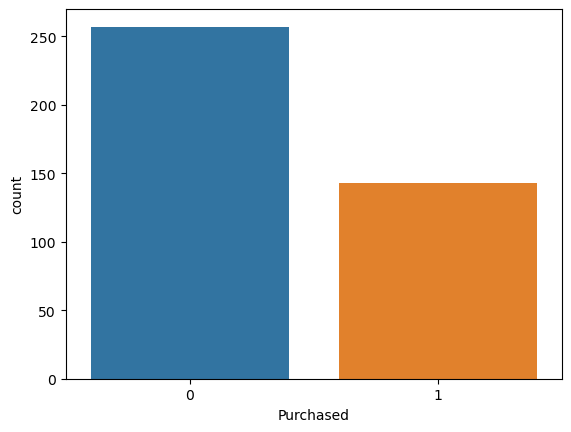

In [8]:
sns.countplot(x = 'Purchased', data = data)

#### Splitting the dataset

In [10]:
X = data.drop('Purchased', axis = 1).values
y = data['Purchased'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
X_train[:5]

array([[ 1.92295008,  2.14601566],
       [ 2.02016082,  0.3787193 ],
       [-1.3822153 , -0.4324987 ],
       [-1.18779381, -1.01194013],
       [ 1.92295008, -0.92502392]])

In [23]:
X_test[:5]

array([[-0.79895082,  0.49460758],
       [-0.02126485, -0.57735906],
       [-0.31289709,  0.14694273],
       [-0.79895082,  0.26283101],
       [-0.31289709, -0.57735906]])

In [16]:
X_train.shape, y_train.shape

((320, 2), (320,))

In [17]:
X_test.shape, y_test.shape

((80, 2), (80,))

#### Feature Scaling

In [18]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train[:5]

array([[ 1.92295008,  2.14601566],
       [ 2.02016082,  0.3787193 ],
       [-1.3822153 , -0.4324987 ],
       [-1.18779381, -1.01194013],
       [ 1.92295008, -0.92502392]])

In [21]:
X_test[:5]

array([[-0.79895082,  0.49460758],
       [-0.02126485, -0.57735906],
       [-0.31289709,  0.14694273],
       [-0.79895082,  0.26283101],
       [-0.31289709, -0.57735906]])

#### Building Logistic Regression Classifier

In [25]:
logistic_classifier = LogisticRegression()

In [26]:
logistic_classifier.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred_train = logistic_classifier.predict(X_train)
y_pred_test = logistic_classifier.predict(X_test)

In [47]:
actual_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
actual_pred_df.head(7)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0


#### Classification Metrics on obtained results

In [49]:
print('\n **************** Classification Report - Training Data **************** \n')
print(classification_report(y_train, y_pred_train))


 **************** Classification Report - Training Data **************** 

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       199
           1       0.82      0.68      0.74       121

    accuracy                           0.82       320
   macro avg       0.82      0.79      0.80       320
weighted avg       0.82      0.82      0.82       320



In [52]:
logistic_classifier.classes_

array([0, 1], dtype=int64)


 **************** Confusion Martix - Training Data **************** 



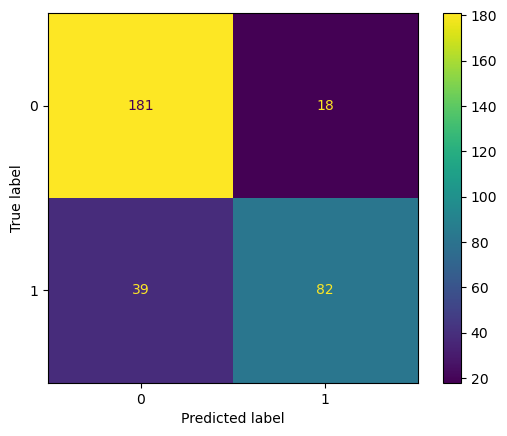

In [53]:
print('\n **************** Confusion Martix - Training Data **************** \n')
cm = confusion_matrix(y_train, y_pred_train, labels=logistic_classifier.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show();

In [54]:
tn, fp, fn, tp = cm.ravel()

print(f"True Negative: {tn}")
print(f"False Positive: {fp}")
print(f"False Negative: {fn}")
print(f"True Positive: {tp}")

True Negative: 181
False Positive: 18
False Negative: 39
True Positive: 82


In [55]:
print('\n **************** Classification Report - Training Data **************** \n')
print(classification_report(y_test, y_pred_test))


 **************** Classification Report - Training Data **************** 

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80




 **************** Confusion Martix - Training Data **************** 



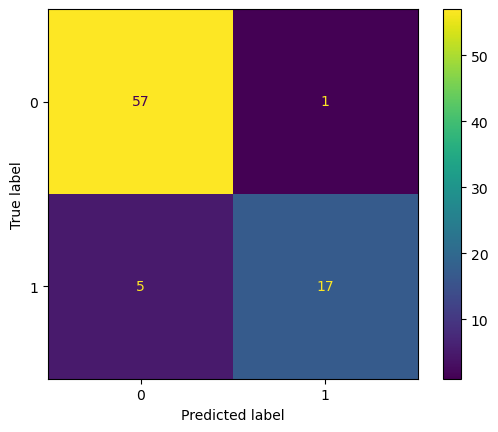

In [57]:
print('\n **************** Confusion Martix - Training Data **************** \n')
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show();

#### Predicting user provided inputs

In [39]:
def get_predictions(age, salary, model, scaler = None):
    try:
        age = float(age)
        salary = float(salary)
    except:
        return "Invalid inputs!, please try again with int or float inputs."
    
    features = np.array([age, salary]).reshape(-1,2)
    print(features)
    if scaler:
        features = scaler.transform(features)
    print(features) 
    prediction = model.predict(features)
    return prediction

In [32]:
age = input("Enter the age: ")
salary = input("Enter the Salary: ")

Enter the age: 18
Enter the Salary: 3400000


In [40]:
get_predictions(age, salary, model = logistic_classifier, scaler = scaler)

[[1.8e+01 3.4e+06]]
[[-1.96547978 96.47908045]]


array([1], dtype=int64)

#### Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


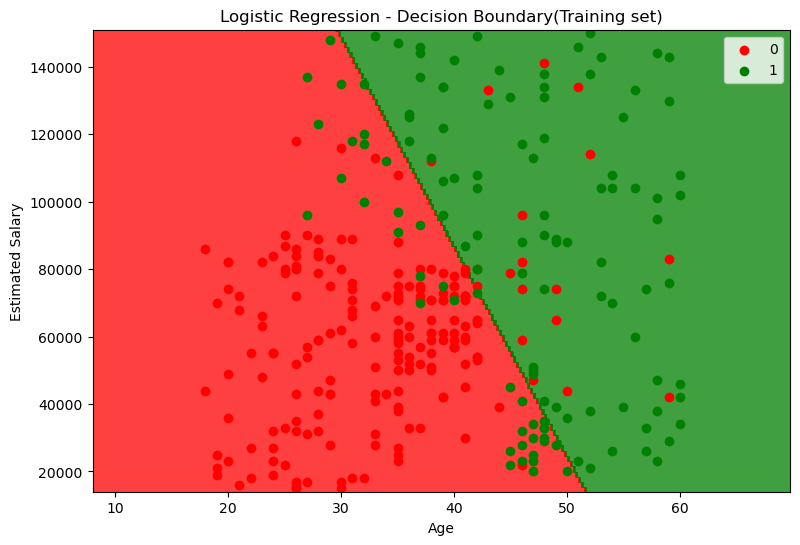

In [59]:
plt.figure(figsize=(9,6))
X_set, y_set = scaler.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, logistic_classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression - Decision Boundary(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


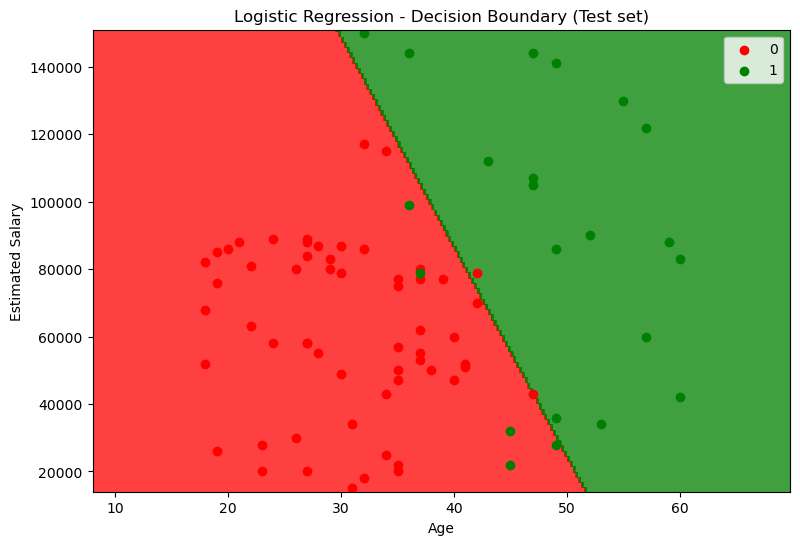

In [60]:
plt.figure(figsize=(9,6))
X_set, y_set = scaler.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, logistic_classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression - Decision Boundary (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()